# 0) Instructions:
Please complete the workbook below. Some of the calculations are already ready to be "run". However, please read the text carefully to find questions that you should answer for credit. Remember that to answer a question in text, you click "insert", then "insert cell below", switch the input from "code" to "markdown", type your answer, and finally click the run button to set your text in stone. In a few questions, you will need to do some calculations on your own. Hint: for these calculations you can copy, paste, and modify code that is above the calculation that you need to do. You may work by yourself or in groups of 2. Please remember to put your name on top, remember to save the workbook, and remember to upload to Canvas.

**Please read** Please run the code below to install the "DescTools", "EnvStats", and "Stat2Data" packages. **Do not proceed until the star goes away! Do not click run twice**!

In [1]:
install.packages('DescTools', dep = TRUE)
install.packages('EnvStats', dep = TRUE)
install.packages('Stat2Data', dep = TRUE)

Warning message:
"dependency 'RDCOMClient' is not available"


  There is a binary version available but the source version is later:
           binary  source needs_compilation
DescTools 0.99.29 0.99.30              TRUE

  Binaries will be installed
package 'DescTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ptrainor\AppData\Local\Temp\RtmpAPRmjd\downloaded_packages


**Please read** Please run the code below and ignore the output. This code is simply setting the height and width of the plots we will make later on and loading the packages that we will use.

In [5]:
library(DescTools)
library(EnvStats)
library(tidyverse)
library(Stat2Data)
options(repr.plot.width = 6, repr.plot.height = 5)


Attaching package: 'EnvStats'

The following objects are masked from 'package:stats':

    predict, predict.lm

The following object is masked from 'package:base':

    print.default

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# 1) Comparing two population variances
To start off we are going to go through the process of comparing two population variances. We will use a very strange real dataset from a study looking at the pH of the brains of humans who have recently died. We will only use a subset of this data but the citation is here: "Jun Z. Li et al. (2013), "Circadian patterns of gene expression in the human brain and disruption in major depressive disorder," PNAS, vol 110, no. 24, www.pnas.org/cgi/doi/10.1073/pnas.1305814110"

The first thing that we will do is load the data. Because this data in one of the packages that we loaded ("Stat2Data"), if we use the "data" command with the name of the dataset, "BrainpH", it will load this data and make it available to us as "BrainpH". When running this command you shouldn't see any output:

In [6]:
data(BrainpH)

Now let's see how many observations are in this dataset using the "nrow" function which counts the number of rows of a "data.frame" or dataset: 

In [10]:
nrow(BrainpH)

[1] 54

Since that is a good amount of observations, let's just print the first 6 observations to see what this dataset looks like. To do this we will use the "head" function which prints out the first 6 rows of a "data.frame": 

In [11]:
head(BrainpH)

pH,Sex,Ethnicity,Age,DeathType
7.13,M,Caucasian,64,Cardiac
6.50,M,Caucasian,63,Cardiac
6.40,M,AfricanAmerican,59,Cardiac
6.53,M,Caucasian,52,Cardiac
6.58,M,Caucasian,58,Cardiac
6.63,M,Caucasian,78,Other


## 1.1) Hypothesis test involving two population variances by hand:
Okay, let's say you want to know if the pH of brains from recently deceased humans has higher variability in females than in males. Let's call females "Population 1" and males "Population 2". 

**Question for you** To determine if there is evidence that the population variance of pH measurements is higher in females than in males, what would your null and alternative hypotheses be?. Please answer this question in a new markdown cell below. You do not need to use symbols, you can say things like (for example): "sigma squred from population 1 is less than or equal to..." rather than $\sigma_1^2 \leq ...$".

Okay, now that we have specified our hypotheses, let's conduct a formal statistical test with $\alpha = 0.10$. To do this we will need a test statistic $F^* = s_1^2 / s_2^2$. So we will need to find the sample variances. For this we can use the "aggregate" function. This function applies a function to a variable *by a grouping variable*. So for us, we want to compute the sample variance of pH measurements separately by sex (so sex is our grouping variable). The aggregate function has a few arguments, a formula (in our case "pH ~ Sex") that means apply a function to "pH" separately by "Sex", "data" which specifies what dataset the "pH" and "Sex" variables are from, and "FUN" which specifies which function we would like to apply. For us we want the sample variance so we will use the "var" fun. Please run the code below to calculate the sample variance of pH measurements by sex: 

In [14]:
aggregate(pH ~ Sex, data = BrainpH, FUN = var)

Sex,pH
F,0.09311667
M,0.04730883


**Question for you.** Now that you have computed the sample means, what is the value of the test statistic, $F^*$? Please compute it using code below.

Okay, we now have our set of hypotheses, we know $\alpha = 0.10$, and we have a test statistic. Let's now find the rejection region / rejection rule for determining if we have evidence to reject the null hypothesis. For this we will need quantiles from the $F$ distribution. To find these, we need to know $\alpha$, $\text{df}_1$, and $\text{df}_2$. To find $\text{df}_1$, and $\text{df}_2$, we need to know the sample size from each populations (female and male). We can use the "aggregate" function again. It will have the same arguments, except instead of using "FUN = var" to determine the sample variance of pH measurements by sex, we will use "FUN = length". This will count the number of pH measurements by sex, which will give us the sample sizes we need. Please run this code below: 

In [15]:
aggregate(pH ~ Sex, data = BrainpH, length)

Sex,pH
F,10
M,44


Now we are ready to determine the critical value from the $F$ distribution with $\text{df}_1 = 10-1$, and $\text{df}_2 = 44-1$. We will use the "qf" function which stands for "quantile from an $F$ distribution". We will use the "lower.tail = FALSE" function to look for the quantile that gives us a right tailed probability for $\alpha$: 

In [ ]:
qf(0.10, df1 = 10 - 1, df2 = 44 - 1, lower.tail = FALSE)

**Question for you.** Please state the rejection rule for this test in a new markdown cell below. 

**Question for you.** Now that you have a set of hypotheses, a rejection rule, and a test statistic, what is the conclusion of this test. Please answer below in a new markdown cell. 

Now, to compute a p-value or the level of significance for this test, we will look for $P(F>F^*)$. To do this we can use the "pf" function ("probability from an $F$ distribution"), with the correct degrees of freedom and using "lower.tail = FALSE" to get the right-tailed probability:

In [16]:
pf(0.09311667 / 0.04730883, df1 = 10 - 1, df2 = 44 - 1, lower.tail = FALSE)

[1] 0.06723433

## 1.2) Hypothesis test involving two population variances by hand:
As you might expect, we can do all of the work we did in 1.1 using just one function in R "var.test". To use this function we will want to specify an "x" corresponding to the first population and a "y" corresponding to the second population. We will also have to specify what kind of alternative hypothesis we are posing. In this case, $H_a: \sigma_1^2 > \sigma_2^2$, which means we will specify 'alternative = "greater"'. There is one other thing to note: when we specify our measurements "x" and "y", we need them to a be a simple list of numbers. So we will use "[]" notation to subset our data by Sex. To see how it works, please run the following two lines before running the code with "var.test": 

In [18]:
BrainpH$pH

[1] 7.13 6.50 6.40 6.53 6.58 6.63 7.11 7.04 7.00 7.15 6.76 6.96 7.14 7.21 7.25
[16] 7.18 7.12 6.55 7.18 7.05 6.59 6.88 6.94 6.85 6.59 6.60 6.98 6.68 7.07 7.21
[31] 6.88 7.01 7.02 6.69 6.90 6.76 6.30 6.64 6.81 6.87 6.97 6.62 7.03 6.61 6.99
[46] 6.60 6.86 7.10 6.79 7.02 6.89 6.83 6.97 6.76

In [19]:
BrainpH$pH[BrainpH$Sex == "F"]

[1] 7.11 7.21 6.55 7.05 6.60 7.21 6.90 6.30 6.99 6.83

In [17]:
var.test(x = BrainpH$pH[BrainpH$Sex == "F"], y = BrainpH$pH[BrainpH$Sex == "M"], alternative = "greater")


	F test to compare two variances

data:  BrainpH$pH[BrainpH$Sex == "F"] and BrainpH$pH[BrainpH$Sex == "M"]
F = 1.9683, num df = 9, denom df = 43, p-value = 0.06723
alternative hypothesis: true ratio of variances is greater than 1
95 percent confidence interval:
 0.9344956       Inf
sample estimates:
ratio of variances 
          1.968273 


## 1.3) A confidence interval for the ratio of population variances "by hand": 
Now, let's determine a confidence interval for the ratio of the population variances (of brain pH) between females and males. We will continue to have females be Population 1 and males to be Population 2. Let's determine a 90% confidence interval for this ratio. Our first step is going to be to determine $F_U = F_{\alpha / 2, \text{df}_2, \text{df}_1}$. This one will be easy. We will use the "qf" function to look for the quantile that gives us a right-tailed probability of $\alpha / 2$. To make sure we get the quantile for the right-tailed probability we will use "lower.tail = FALSE":

In [20]:
qf(0.10 / 2, 44 - 1, 10 - 1, lower.tail = FALSE)

[1] 2.817918

Okay, now to find $F_L$ is a bit more difficult. In the lecture we discussed that to use the textbook appendix tables, we will have to use the following equation: $F_L = F_{1-\alpha / 2, \text{df}_2, \text{df}_1} = 1 / F_{\alpha / 2, \text{df}_1, \text{df}_2}$. So here we will find $1 / F_{\alpha / 2, \text{df}_1, \text{df}_2}$:

In [21]:
1 / qf(0.10 / 2, 10 - 1, 44 - 1, lower.tail = FALSE)

[1] 0.4747796

However, unlike the textbook appendix tables, we can find any value from the $F$ distribution using R, so we could have asked for $F_{1-\alpha / 2, \text{df}_2, \text{df}_1}$ directly: 

In [23]:
qf(1 - 0.10 / 2, 44 - 1, 10 - 1, lower.tail = FALSE)

[1] 0.4747796

**Question for you.** What are the values of $F_L$ and $F_U$. Please answer in a new markdown cell below. 

Now we are ready to determine the 90% confidence interval for the ratio of population variances. We will use the formula $\left(\frac{s_1^2}{s_2^2} F_L, \frac{s_1^2}{s_2^2}F_U \right)$ :

In [24]:
0.09311667 / 0.04730883 * qf(1 - 0.10 / 2, 44 - 1, 10 - 1, lower.tail = FALSE)

[1] 0.9344956

In [25]:
0.09311667 / 0.04730883 * qf(0.10 / 2, 44 - 1, 10 - 1, lower.tail = FALSE)

[1] 5.546431

**Question for you**. What is the 90% confidence interval for the ratio of population variances. Please answer in a new markdown cell below. 

## 1.4) A CI for the ratio of population variances using software
Now we can use the "var.test" function again for determining a confidence interval. We will specify 'alternative = "two.sided"' so that we get a confidence interval that has symmetric Type I error probabilities on the left and right hand side (like all the confidence intervals we make in this class. Since we want a 90% confidence interval we will specify "conf.level = 0.90": 

In [26]:
var.test(BrainpH$pH[BrainpH$Sex == "F"], BrainpH$pH[BrainpH$Sex == "M"], 
         alternative = "two.sided", conf.level = 0.90)


	F test to compare two variances

data:  BrainpH$pH[BrainpH$Sex == "F"] and BrainpH$pH[BrainpH$Sex == "M"]
F = 1.9683, num df = 9, denom df = 43, p-value = 0.1345
alternative hypothesis: true ratio of variances is not equal to 1
90 percent confidence interval:
 0.9344956 5.5464310
sample estimates:
ratio of variances 
          1.968273 


**Question for you.** Now, please determine an 80% confidence interval for the ratio of population variances by copying, pasting, and modifying the code from above in a new code cell below. 

**Question for you.** What value of the ratio of population variances would correspond to the variances being equal between the two groups? Is this value contained in the 90% confidence interval? Is this value contained in the 80% confidence interval? Which one of these intervals agrees with the result of the hypothesis test? Please answer these questions in a new markdown cell below. 

# 2) Analysis of Variance Part 1: The overall $F$ test
Now in this part of the lab we will change directions and dicuss comparing means between three or more populations. As an example we will analyze the weights of chickens that were fed various types of feed. This data was published in the journal *Biometrika* in 1948. Below, we will load the data using the "data" command, and we will also do some sampling from this dataset (this involves the "group_by" and "sample_n") commands. Feel free to run and ignore this part. Basically, the original data has unbalanced sample sizes (some $n$'s are more than others) and we have not yet discussed how to deal with this case. So we will take 10 observations from each population:

In [33]:
data(chickwts)
set.seed(3)
chickwts <- chickwts %>% group_by(feed) %>% sample_n(10)

Okay, now that the data is available to us, let's use the "head" function to take a look at the first 6 observations: 

In [34]:
head(chickwts)

weight,feed
404,casein
222,casein
352,casein
260,casein
390,casein
379,casein


From that you can observe that one of the types of feeds for these chickens was "horsebean". Let's take a look at the other types of feed that were included in this experiment:

In [35]:
table(chickwts$feed)


   casein horsebean   linseed  meatmeal   soybean sunflower 
       10        10        10        10        10        10 

Before we discuss conducting an Analysis of Variance, let's take a look at the weight data from one of the populations of chickens (that was fed linseed)". Let's determine if these weights appear to be approximately normal. Please run the code below to make a Q-Q plot of the data: 

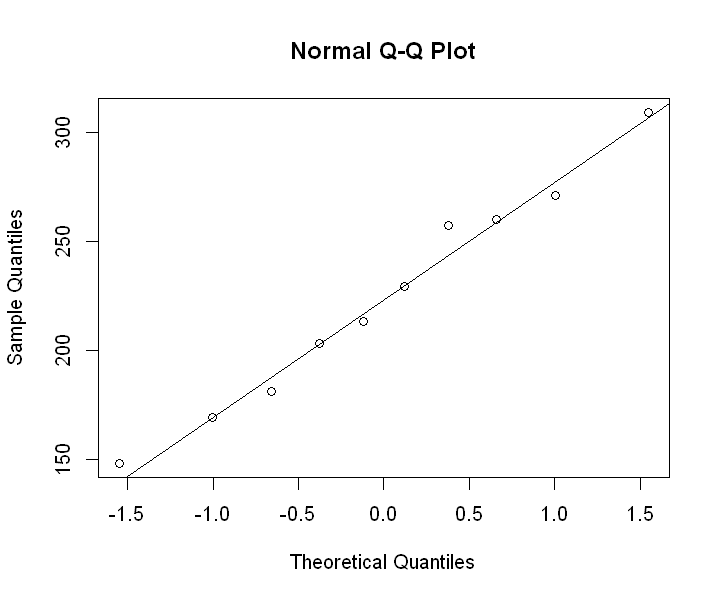

In [36]:
qqnorm(chickwts$weight[chickwts$feed == "linseed"])
qqline(chickwts$weight[chickwts$feed == "linseed"])

**Question for you.** Based on the above Q-Q plot, would you say that the data is approximately normally distributed? Please answer below in a markdown cell.

**Question for you**. Imagine that you want to determine if there is evidence that the chicken weights depends on the type of feed that is given to the chickens. Below, please explain what your null and alternative hypotheses would be for which we will use an overall $F$ test. 

Before we formally conduct an ANOVA $F$ test, let's take a look at the distribution of the weights for each sample with a different type of feed. Below we will make a boxplot that has feed on the horizontal axis (x), weight on the vertical axis (y), and is also collored (fill) inside by the feed type. 

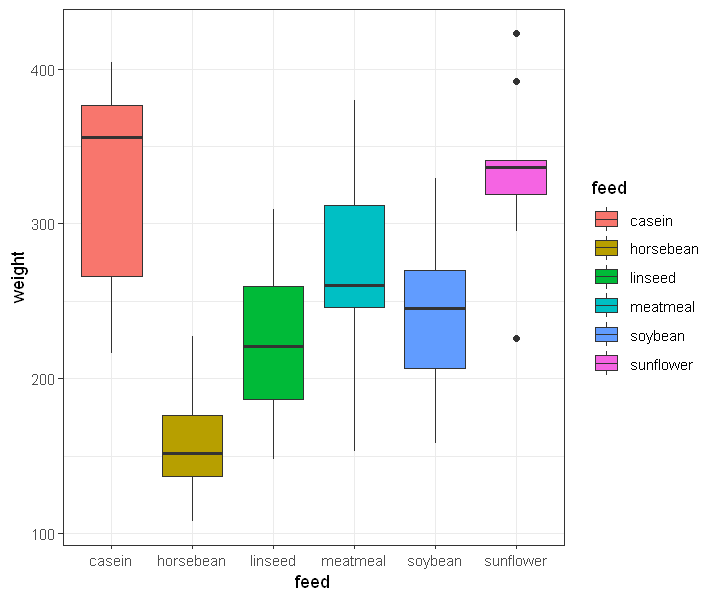

In [44]:
ggplot(chickwts, aes(x = feed, fill = feed, y = weight)) + geom_boxplot() + theme_bw()

Since our ANOVA $F$ test involves population means we might want to add the means within each sample to the boxplot. Below, we will add the means as red diamonds. Also in this version, we will add the "alpha = .5" to the geom_boxplot layer to make the color more translucent. Art!

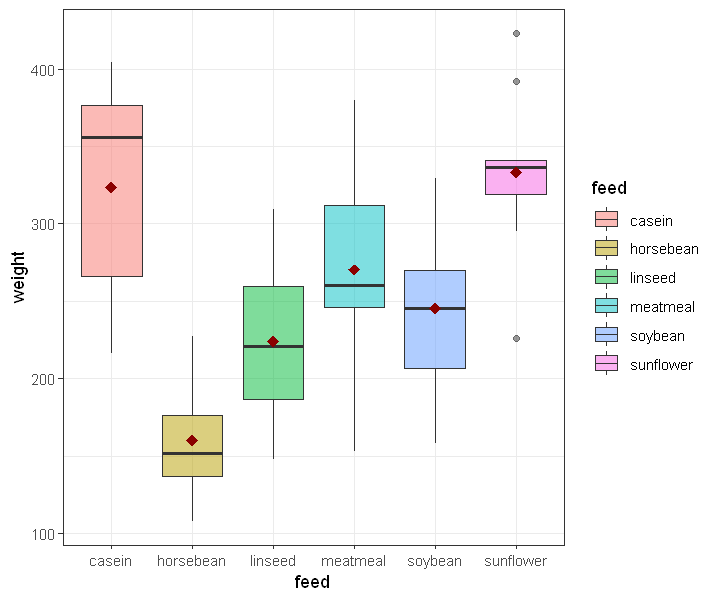

In [43]:
ggplot(chickwts, aes(x = feed, fill = feed, y = weight)) + geom_boxplot(alpha = .5) + 
  stat_summary(fun.y = mean, colour = "darkred", geom = "point", shape = 18, size = 3, show.legend = FALSE) +
  theme_bw()

**Question for you.** Based on the boxplot with the means shown above, do you think we will find evidence that the mean weight of chickens does depend on the type of feed? Please answer below in a new markdown cell. 

## 2.1) Conducting an ANOVA $F$ test "by hand"
Let's assume that we want to conduct an ANOVA to determine if we have sufficient evidence $\alpha = 0.01$, that the mean chicken weights differ by feed type. We have a long process to conduct an ANOVA $F$ test "by hand". Once we have specified our hypotheses (you have already done this in section #2), we will need to determine a critical value from an $F$ distribution that will give us a rejection rule, and we will need to determine our $F$ test statistic.  Let's start by determining the $F$ test statistic. For this we will need to determine the within-sample sum of squares (SSW) and the sum of squares between samples (SSB). Let's start with SSB first. 

Remember that for SSB, we use the following: $\sum_{j = 1}^k n_j (\bar{y}_{j.} - \bar{y}_{..} )^2$

So we will need to calculate $\bar{y}_{j.}$ which is the mean weight for each type of feed $j$:

In [37]:
aggregate(weight ~ feed, data = chickwts, mean)

feed,weight
casein,323.3
horsebean,160.2
linseed,224.0
meatmeal,270.2
soybean,245.4
sunflower,333.0


Above we can see the means from each group. Now, let's save this set of means as a new "data.frame" called "groupMeans": 

In [46]:
groupMeans <- aggregate(weight ~ feed, data = chickwts, mean)

Now to determine $\bar{y}_{..}$, we will need to take the mean of the $\bar{y}_{j.}$'s: 

In [47]:
mean(groupMeans$weight)

[1] 259.35

Now to calculate the $\bar{y}_{j.} - \bar{y}_{..} $'s we can do the following:

In [48]:
groupMeans$weight - mean(groupMeans$weight)

[1]  63.95 -99.15 -35.35  10.85 -13.95  73.65

Okay, so now let's save these $\bar{y}_{j.} - \bar{y}_{..}$ values as a new column in our "data.frame" that had the group means. This will allows us to square them and sum them up later on:

In [49]:
groupMeans$meanMinusGrandMean <- groupMeans$weight - mean(groupMeans$weight)

Okay, let's pause here and see what this "data.frame" looks like:

In [51]:
groupMeans

feed,weight,meanMinusGrandMean
casein,323.3,63.95
horsebean,160.2,-99.15
linseed,224.0,-35.35
meatmeal,270.2,10.85
soybean,245.4,-13.95
sunflower,333.0,73.65


Okay, now let's add a new column that will have the $(\bar{y}_{j.} - \bar{y}_{..} )^2$ values:

In [52]:
groupMeans$meanMinusGrandMeanSq <- groupMeans$meanMinusGrandMean^2

And let's take a look at this "data.frame" now:

In [53]:
groupMeans

feed,weight,meanMinusGrandMean,meanMinusGrandMeanSq
casein,323.3,63.95,4089.6025
horsebean,160.2,-99.15,9830.7225
linseed,224.0,-35.35,1249.6225
meatmeal,270.2,10.85,117.7225
soybean,245.4,-13.95,194.6025
sunflower,333.0,73.65,5424.3225


We now have everything that we need to compute $\text{SSB} = \sum_{j = 1}^k n_j (\bar{y}_{j.} - \bar{y}_{..} )^2$:

In [54]:
sum(10 * groupMeans$meanMinusGrandMeanSq)

[1] 209066

In [ ]:
sum(10 * groupMeans$meanMinusGrandMeanSq) / (6-1)

Now that we have SSB, let's calculate SSW. To do this we will use the formula: $(n_1 - 1) s_1^2 + (n_2 - 1) s_2^2 + (n_3 - 1) s_3^2 + ... + (n_k - 1) s_k^2$. We can use the "aggregate" function as we did before to calculate the sample variance for each group: 

In [59]:
aggregate(weight ~ feed, data = chickwts, FUN = var)

feed,weight
casein,5062.900
horsebean,1491.956
linseed,2561.778
meatmeal,4129.956
soybean,2875.822
sunflower,2774.444


Okay, let's save the above "data.frame" that has all of the sample variances (of chicken weights) by feed as "varByGroup":

In [60]:
varByGroup <- aggregate(weight ~ feed, data = chickwts, FUN = var)

Okay, no to find SSW, we need to multiply each one of these sample variances by the relevant sample size minus 1 (here this is 9 for all groups) and add them all together. We do this below: 

In [61]:
sum(9 * varByGroup$weight)

[1] 170071.7

**Question for you.** What are the values of SSB and SSW? Please answer below in a new markdown cell. 

Our next step prior to determining our ANOVA $F$ statistic will be to determine the mean squares, $s_B^2$ and $s_W^2$, by using $s_B^2 = \frac{\text{SSB}}{k-1}$ and $s_W^2 = \frac{SSW}{N-k}$. Below, in separate cells we will calculate each. We will then save them as "s2b" and "s2w". Please run the next three cells to do this. 

In [67]:
209065.95 / (6 - 1)

[1] 41813.19

In [68]:
170071.7 / (60 - 6)

[1] 3149.476

In [69]:
s2b <- 209065.95 / (6 - 1)
s2w <- 170071.7 / (60 - 6)

Great! Now that we have these mean squares we can determine our ANOVA $F$-test statistic: $F^* = s^2_B / s^2_W$:

In [70]:
s2b / s2w

[1] 13.27624

Now, we need to determine a critical value, to see if we have evidence that supports rejecting $H_0$. We are going to look for a quantile from the $F$ distribution that has $k-1$ and $N-k$ degrees of freedom. You will notice that these degrees of freedom are the same integers that we divided SSB and SSW by in order to find the mean squares. As an example of how to do this, let's find the quantile from an $F$ distribution with 4 and 40 degrees of freedom that would give us a quantile for a right-tailed probability of 0.025 (please note this is not the quantile we need for our ANOVA):

In [71]:
qf(.025, df1 = 4, df2 = 40, lower.tail = FALSE)

[1] 3.126114

**Question for you.** Determine the correct critical value from an $F$ distribution that we need for conducting our overall ANOVA $F$-test. You should copy, paste, and modify the code from above to find this critical value. 

**Question for you**. Based on your observed test statistic and the critical value corresponding to this test setup, what is your conclusion? In terms of the original problem involving feed type and chicken weights, what is your conclusion? 

Now, we will determine the level of significance of the test that we have conducted. To do this we will need to determine $P(F \geq F^*)$. As an example calculation, below you will find $P(F \geq 10)$ from an $F$ distribution with 4 and 40 degrees of freedom: 

In [ ]:
pf(10, 4, 40, lower.tail = FALSE)

**Question for you.** Copy, paste, and modify the code from above in a new code cell below to determine the level of significance of the overall ANOVA $F$-test that we have conducted. 

## 2.2) Conducting an ANOVA $F$-test using software

To conducting an ANOVA $F$-test using R is super easy and fun. We will use the "aov" function. The first argument to this function is called the formula. This has the following form: "Response variable ~ Group variable". So for us, this will be "weight ~ feed" to examine if there are differences in the population means of chicken weights by feed type. the next argument is "data" which tells R which "data.frame" contains these two variables. We wrap the "aov" function in another function called "summary". What this function does is provide us with a nice summary table from the ANOVA $F$-test, showing us SSB, SSW, the mean squares, the $F^*$ test statistic, and the p-value for the test. Please run the code to see this:

In [73]:
summary(aov(weight ~ feed, data = chickwts))

            Df Sum Sq Mean Sq F value   Pr(>F)    
feed         5 209066   41813   13.28 1.92e-08 ***
Residuals   54 170072    3149                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1